## 16.6 Homework

Write a program to find the minium of 
    $$ f(x,y) = \frac{x^2}2 + \frac{y^2}3 - \frac{xy}4 $$
    
- 1, from your own code (except Monte Carlo)
- 2, from scipy

### Part 1

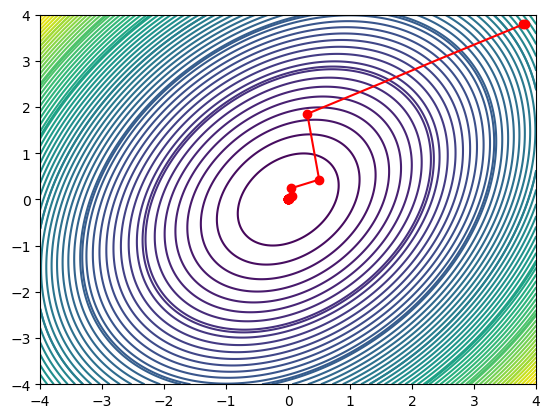

results of f_min:  4.4154323055987555e-32   number of iterations:   19
[3.81406907 3.80448741] 8.440597076132464
[-2.46113724e-16  1.31588917e-16] 8.418232070633989


In [113]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
    return ((x**2)/2) + y**2/3 - x*y/4

def derivative(f, xy, d=0.001):
    '''
    f: callable func
    xy: [0.0, 1.0]
    d: precision to compute the numerical gradient based on the central difference
    '''
    x, y = xy[0], xy[1]
    dfdx = (f(x+d/2,y)-f(x-d/2,y))/d  #central diff on x
    dfdy = (f(x,y+d/2)-f(x,y-d/2))/d  #central diff on y
    return np.array([dfdx,dfdy])  #df/dx, df/dy

def gradient_optim(f, xy0, N=1000):
    '''xy0: 1x2 array bc it has x and y values'''
    #initial values
    xy_now = xy0
    xy_prev = None
    xy_hist = []
    xy_hist.append(xy_now)
    
    for i in range(N):
        df_now = derivative(f,xy_now)
        
        if xy_prev is None:
            dxy = 0.01
        else:
            df_prev = derivative(f, xy_prev)
            dd = df_now - df_prev
            dxy = np.dot(xy_now - xy_prev, dd) / (np.linalg.norm(dd))**2
        
        xy_next = xy_now - df_now*dxy
        x_next, y_next = xy_next[0], xy_next[1]
        x_now, y_now = xy_now[0], xy_now[1]
        
        #print("step:    ", f(x_now), f(x_next))
        if f(x_next,y_next)>f(x_now,y_now):
            break
        else:
            xy_prev = xy_now
            xy_now = xy_next
            xy_hist.append(xy_now)

    return np.array(xy_hist), f(x_now,y_now)

#to generate random initial points
N = 1000
a = 16578 
c = 476877
m = 8.001893
xo,yo = 1,1  #seed

results_x = []
results_y = []

for i in range(N):      
    xo = (a*xo+c)%m
    results_x.append(xo-4)
    
for i in range(N):      
    yo = (a*yo+c)%m
    results_y.append(yo-4)
    
#minimizing the func
rand_list1 = np.random.randint(0,N)
rand_list2 = np.random.randint(0,N)
[x0, y0] = results_x[rand_list], results_y[rand_list2]
xy_hist, f_min = gradient_optim(f,[x0,y0])
 
#plot the graph
nx = np.linspace(-4,4,400)
ny = np.linspace(-4,4,400)

x,y = np.meshgrid(nx,ny)
z = f(x, y)
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)
plt.contour(x,y,z)

plt.plot(xy_hist[:,0], xy_hist[:,1], 'ro-')
plt.show()
print('results of f_min: ', f_min, '  number of iterations:  ', len(xy_hist))

x_hist, y_hist = xy_hist[0], xy_hist[1]

print(xy_hist[0], f(x_hist[0], y_hist[0]))
print(xy_hist[-1], f(x_hist[-1], y_hist[-1]))

### Part 2

In [124]:
from scipy.optimize import minimize

x0, y0 = results_x[rand_list], results_y[rand_list2]
res = minimize(f, x0,y0, method='nelder-mead', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 4.372392
         Iterations: 18
         Function evaluations: 36


In [125]:
res = minimize(f, x0,y0, method='CG', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 4.372392
         Iterations: 1
         Function evaluations: 6
         Gradient evaluations: 3


In [126]:
res = minimize(f, x0,y0, method='BFGS', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 4.372392
         Iterations: 2
         Function evaluations: 6
         Gradient evaluations: 3


In [127]:
res = minimize(f, x0,y0, method='powell', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 4.372392
         Iterations: 2
         Function evaluations: 58
